<h1 align="center">AtliQo Bank Credit Card Launch: Phase 1</h1>


Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



<h1 style="color:purple" align="center">Data Import<h1>

**We got the dataset in two formats (1) CSV (2) MySQL.**

### Option 1. Read data from CSV

In [2]:
df_cust = pd.read_csv("datasets/customers.csv")
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
df_cp = pd.read_csv("datasets/credit_profiles.csv")
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [4]:
df_trans = pd.read_csv("datasets/transactions.csv")
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


### Option 2. Read it from MySQL

In [5]:
pip install pandas sqlalchemy pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus


In [7]:
# Replace with your database credentials
username = 'root'
password = quote_plus('Psp@5900')
host = '127.0.0.1'  # e.g., 'localhost' or an IP address
port = '3306'  # e.g., '3306' for MySQL
database = 'e_master_card'

# Create the connection string
connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
# Create the engine
engine = create_engine(connection_string)


In [8]:
table_name = 'customers'
df_cust1 = pd.read_sql_table(table_name, con=engine)
df_cust1.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [9]:
table_name = 'credit_profiles'
df_cp1 = pd.read_sql_table(table_name, con=engine)
df_cp1.head()


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [10]:
table_name = 'transactions'
df_trans1 = pd.read_sql_table(table_name, con=engine)
df_trans1.head()


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


<h1 style="color:purple" align="center">Exploration on Customers Table<h1>

In [11]:
df_cust1.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [12]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


<h2 style="color:Purple">1. Analysis of  Income Column<h2>

### Handle Null Values: Annual income

Now let us check if any of our dataframe columns contain null values

In [13]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [14]:
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [15]:
df_cust.annual_income.median()

112218.5

####  We can treat null values with common if we treat them occupation wise median then it will make more sense 

In [16]:
df_cust[df_cust.occupation == "Artist"].annual_income.median()

45794.0

In [17]:
df_cust[df_cust.occupation == "Freelancer"].annual_income.median()

46759.0

In [18]:
Occupation_wise_median = df_cust.groupby("occupation")["annual_income"].median()
Occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [19]:
Occupation_wise_median["Artist"]

45794.0

In [20]:
def get_median_val(row):
    if pd.isnull(row['annual_income']):
        return Occupation_wise_median[row["occupation"]]
    else:
        return row["annual_income"]

In [21]:
# Calculate occupation-wise median
occupation_medians = df_cust.groupby('occupation')['annual_income'].median()

# Fill null values with occupation-wise median using a lambda function
df_cust['annual_income'] = df_cust.apply(
    lambda row: occupation_medians[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'], 
    axis=1
)


In [22]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Awesome 😀 Number of null values in all the columns is zero now! Hurray 🥳

Now that there are no null values, let us view the distribution of annual income

In [23]:
df_cust.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


<Axes: xlabel='annual_income', ylabel='Count'>

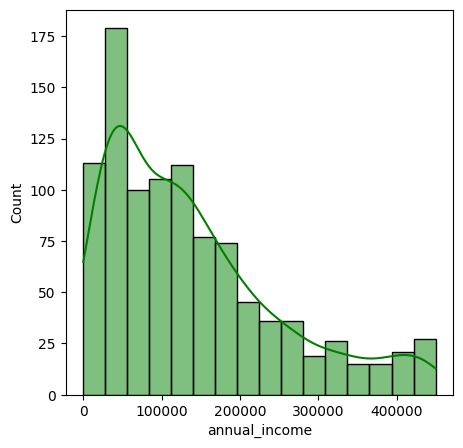

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust["annual_income"],kde=True, color = "green", label="Data")

**You can see above that the income distribution is right skewed**

Let us now use describe() function to check some quick stats

#### Outlier Treatment

In [25]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


We have following observations from the above,

1. **Age**: min = 1, max = 135
1. **Annual Income**: min = 2, max = 447 k

Age column has outliers. Annual income also seem to have outliers in terms of minimum value because business suggested that minimum income should be atleast 100

In [26]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [27]:
df_cust.at[262 , "location"]

'Suburb'

### Outlier Treatment: Annual income

Above records (with <100$ income) are outliers. We have following options to treat them,

1. **Remove them**: After discussion with business, we decided not to remove them as these are valid customers and we want to include them in our analysis
1. **Replace them with mean or median** : Mean is sensitive to outliers. It is better to use median for income values
1. **Replace them with occupation wise median**: Income level may vary based on occupation. For example median income for data scientist can be different from a median income of a business owner. It is better to use occupation wise median income for replacement


In [28]:
for index, row in df_cust.iterrows():
    if row["annual_income"]<100:
        df_cust.at[index , "annual_income"] = occupation_medians[row["occupation"]]

In [29]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [30]:
df_cust.loc[[31,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


Record at 31 and 316 location had annual income of < 100$. Now you can see it is replaced by a median income per occupation

### Data Visualization: Annual Income

We will explore average income level based on occupation, gender, location and marital status

In [31]:
avg_income_as_per_occupation = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_as_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [32]:
avg_income_as_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [33]:
avg_income_as_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

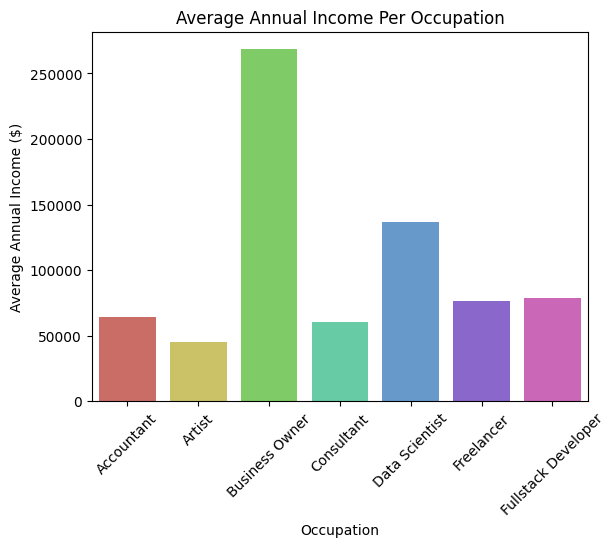

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=avg_income_as_per_occupation.index, y=avg_income_as_per_occupation.values, palette="hls")
plt.xticks(rotation=45)
plt.title("Average Annual Income Per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income ($)")
plt.show()


In [35]:
df_cust.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

In [36]:
categorical_columns = ['gender', 'location', 'occupation','marital_status']


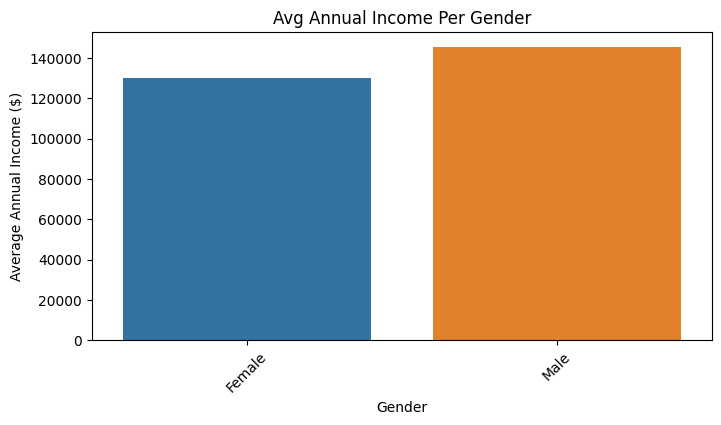

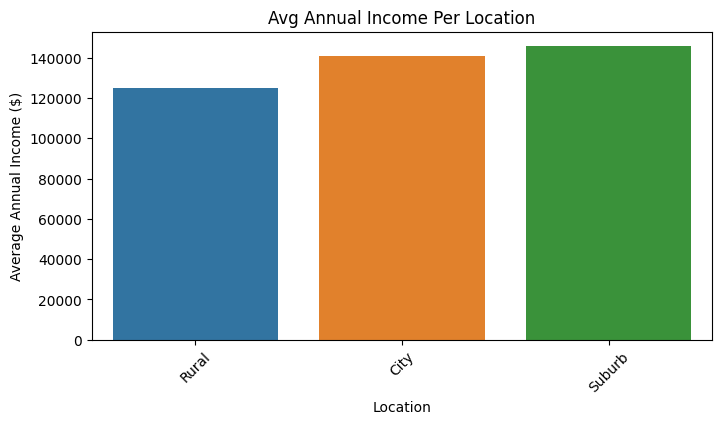

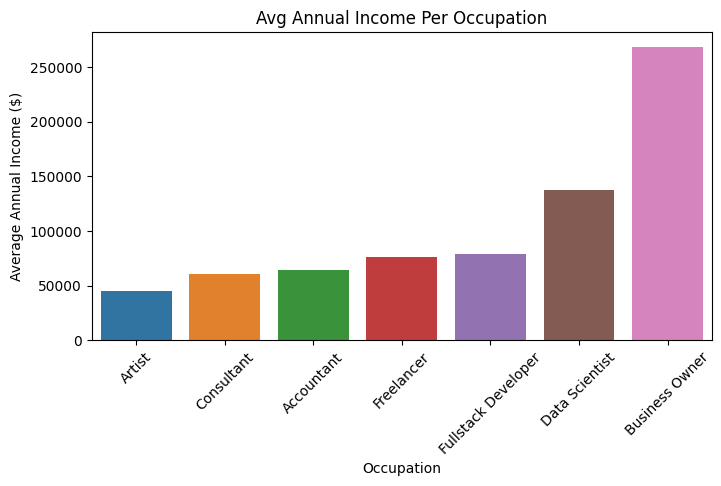

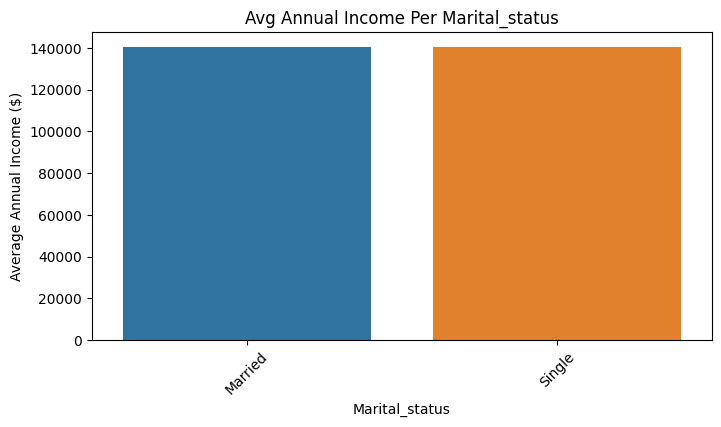

In [37]:
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    avg_income_as_per_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
    sns.barplot(x=avg_income_as_per_group.index , y=avg_income_as_per_group.values , palette="tab10")
    plt.xticks(rotation = 45)
    plt.title(f'Avg Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel("Average Annual Income ($)")
    plt.show()
    

### Code for a 2x2 Grid of Charts

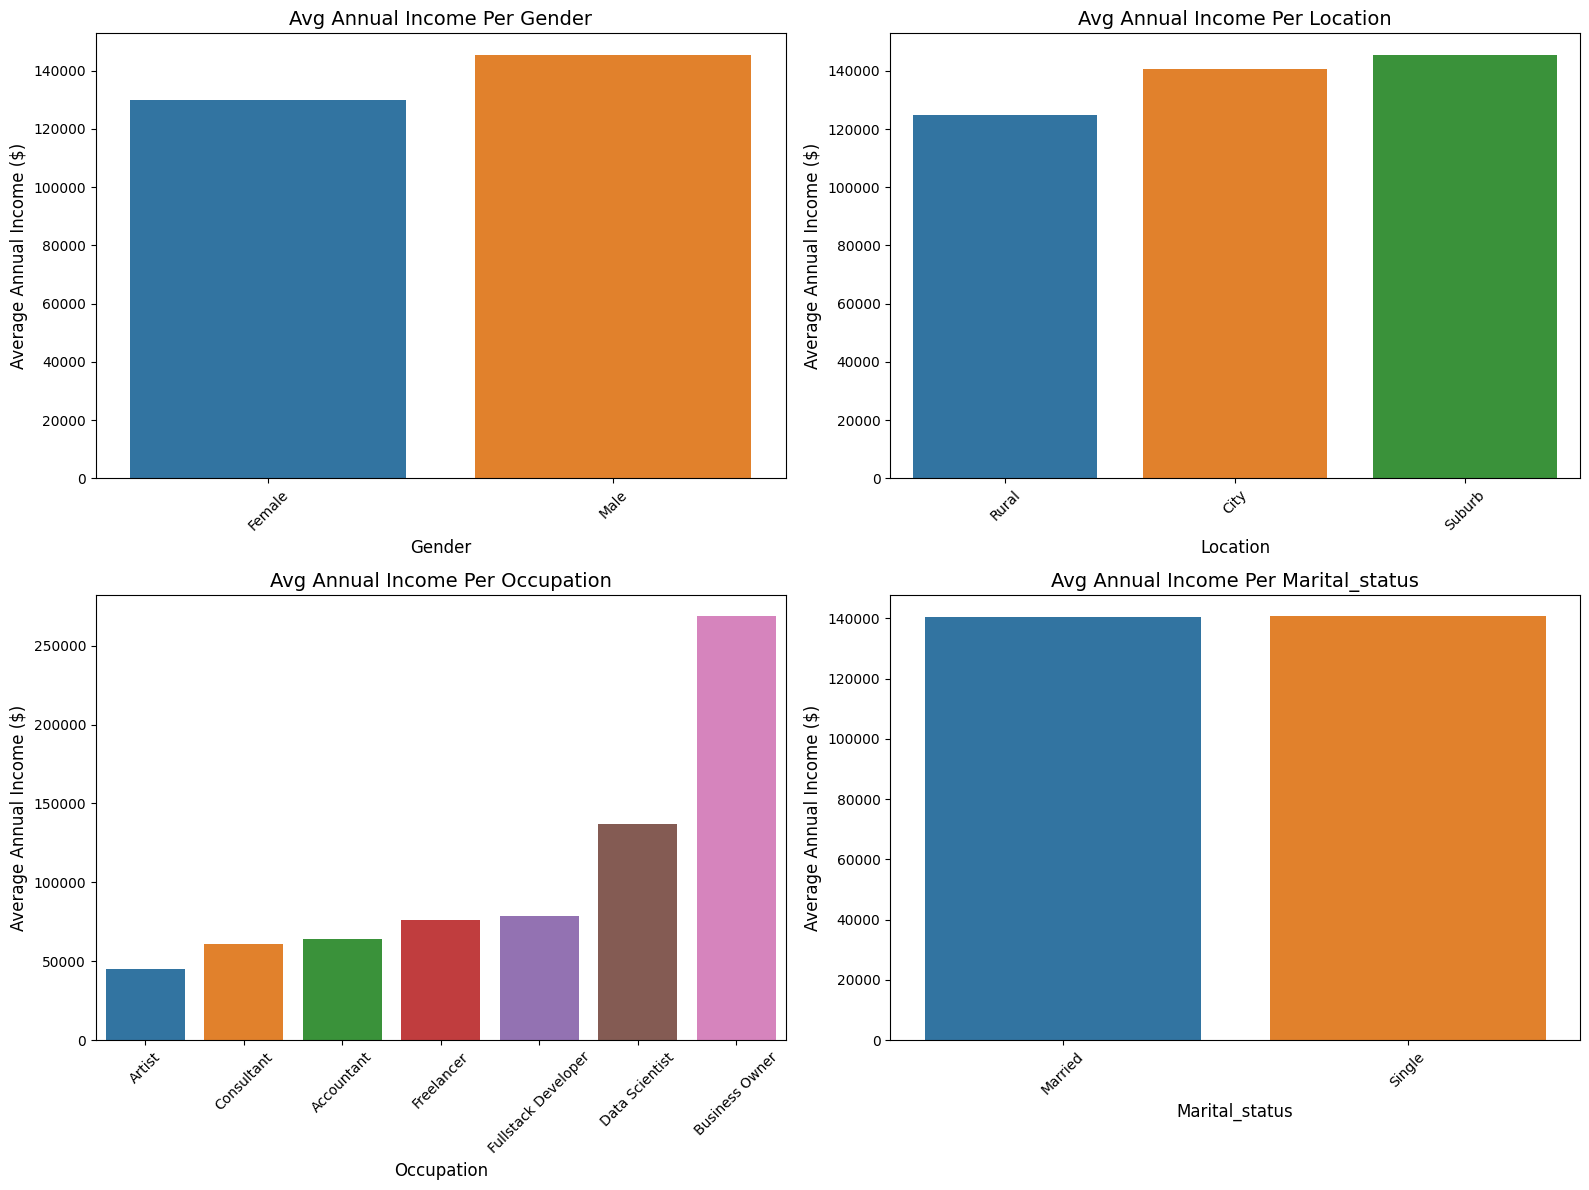

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and corresponding subplot
for i, col in enumerate(categorical_columns):  # Unpack index and column name
    avg_income_as_per_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
    
    # Plot on the corresponding subplot
    sns.barplot(
        x=avg_income_as_per_group.index,
        y=avg_income_as_per_group.values,
        palette="tab10",
        ax=axes[i]  # Correctly index the axes array
    )
    
    # Set titles and labels for each subplot
    axes[i].set_title(f'Avg Annual Income Per {col.capitalize()}', fontsize=14)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].set_ylabel("Average Annual Income ($)", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the complete figure
plt.show()


<h2 style="color:Purple">2. Analysis of Age Column<h2>

### Handle Null Values: Age Column

First let us check if there are any NULL values in the Age column

In [39]:
df_cust.age.isnull().sum()

0

No null values are found in age column. This means we don't need to worry about handling them.

In [40]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

### Outlier Treatment: Age

Above we see that min age is 1 and max age is 135. These seem to be outliers. So let's find out age distribution.

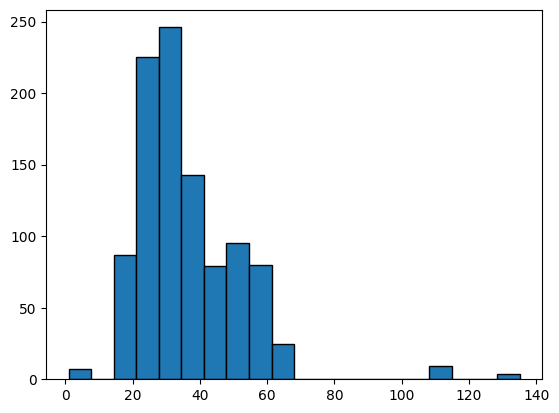

In [41]:
plt.hist(df_cust.age , bins=20 , edgecolor='black')
plt.show()

As per business requirement we can consider value less than 15 and greater than 80 as an outlier.

In [42]:
outliers=df_cust[(df_cust.age<15) | (df_cust.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [43]:
outliers.shape

(20, 8)

Total 20 outliers for age. Now how can we handle these outliers? 

Possible options,

1. Remove them: This doesn't sound like a good option as we will loose important information
1. Replace outlier values with some appropriate value: We can use mean or median for this

In [44]:
df_cust.age.median()   # Here also we can treat outliers with more effective way.

32.0

Instead of replace it with a median age for all customers, how about we calculate median age per occupation?

In [45]:
outliers.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single


As you can see, for business owners median age is 49 whereas artists have youngest age

**We will calculte median per occupation and then use that for replacing outliers**

In [46]:
occupationwise_age_median= df_cust.groupby("occupation")["age"].median()
occupationwise_age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [47]:
for index , row in outliers.iterrows():
    df_cust.at[index ,"age"] = occupationwise_age_median[row['occupation']]

In [48]:
df_cust[(df_cust.age<15) | (df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [49]:
df_cust.iloc[[610,692]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
610,611,Rehan Verma,Male,51.0,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,51.0,City,Business Owner,83045.0,Married


In [50]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140483.548500
std,288.819436,12.276634,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


As we can see above, now we don't have any outliers left. min age is 18 and max is 64

### Data Visualization: Age Column


In [51]:
def categorize_age(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 48:
        return '26-48'
    elif 49 <= age <= 65:
        return '49-65'
    else:
        return 'Other'

df_cust['age_group'] = df_cust['age'].apply(categorize_age)


df_cust.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [52]:
age_group_counts = df_cust.age_group.value_counts()
age_group_counts

age_group
26-48    567
18-25    246
49-65    187
Name: count, dtype: int64

In [53]:
df_cust.age_group.value_counts(normalize=True)*100

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

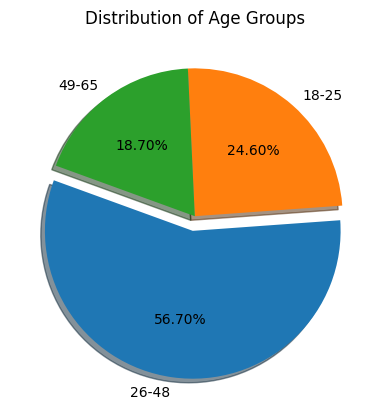

In [54]:
explode = [0.1] + [0] * (len(age_group_counts) - 1)

plt.pie(age_group_counts, 
        labels=age_group_counts.index, 
        autopct="%1.2f%%", 
        shadow=True, 
        explode=explode, 
        startangle=160)

plt.title("Distribution of Age Groups")
plt.show()


##### More than 50% of customer base are in in age group of 26 - 48 adn ~26% are of age group 18 - 25

### Now we have to find distribution acccording to genderwise and locationwise at a time.

In [55]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [56]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [57]:
customer_location_gender = df_cust.groupby(["location", "gender"]).size().unstack()  # unstack is used to create a dataframe from 2 index dataset
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


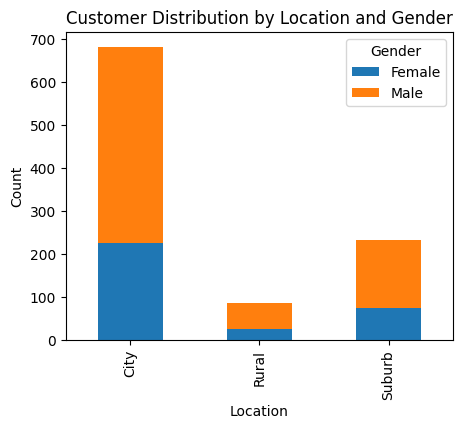

In [58]:
customer_location_gender.plot(kind = "bar" , stacked = True , figsize=(5,4))

plt.legend(title="Gender")
plt.title("Customer Distribution by Location and Gender")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

<h1 style="color:purple" align="center">Explore Credit Score Table<h1>

In [59]:
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


### Data Cleaning Step 1: Remove Duplicates 

In [60]:
df_cp.shape

(1004, 6)

There are 1004 rows in this dataframe whereas customers dataframe had only 1000. There might be invalid or duplicate data in df_cp

In [61]:
df_cust.shape

(1000, 9)

In [62]:
df_cp['cust_id'].nunique()

1000

In [63]:
df_cp[df_cp['cust_id'].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [64]:
df_cp_clean1 = df_cp.drop_duplicates(subset = "cust_id" , keep = "last")
df_cp_clean1.shape

(1000, 6)

In [65]:
df_cp_clean1[df_cp_clean1["cust_id"].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


df_cp_clean_1 looks clean now after cleaning duplicates.

Next step would be to see if there are any null values

### Data Cleaning Step 2: Handle Null Values

In [66]:
# now after removing duplicates from customer id column , we will check null values 
df_cp_clean1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

We can see at credit_limit. It has a bunch of null values. we need to clean them up! From the business knowledge we know that credit limit depends on credit score of a customer. We will try to find out if we can figure out a mathematical relationship between credit score and credit limit and use credit score to full NULL values in credit limit. Let's explore a few things here!

In [67]:
df_cp_clean1[df_cp_clean1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [68]:
df_cp_clean1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

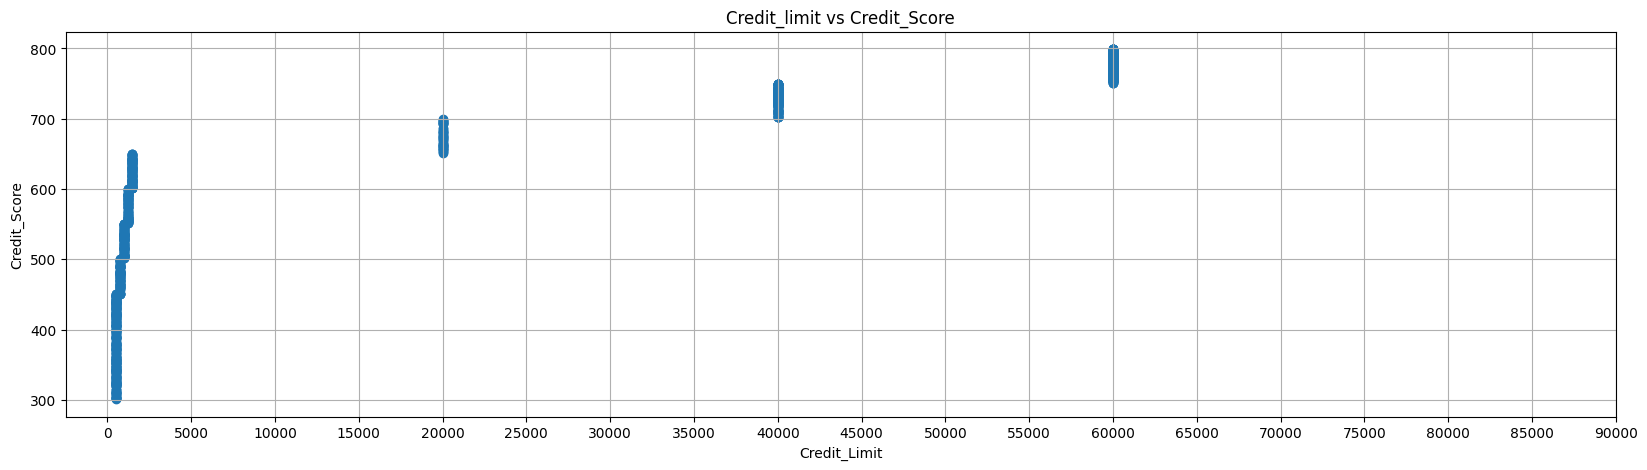

In [69]:
plt.figure(figsize=(20,5))
plt.scatter(df_cp_clean1.credit_limit , df_cp_clean1.credit_score)
plt.title("Credit_limit vs Credit_Score")
plt.xlabel("Credit_Limit")
plt.ylabel("Credit_Score")

plt.xticks(range(0,90001,5000))
plt.grid(True)
plt.show()

Here we can see clear relationship between credit score and credit limit. Where there are levels for example, upto 650 score is getting a very minor credit limit (<1000$) where as a score between 650 to 700 is getting around 20000. Score between 700 to 750 is getting around 40K etc.

In [70]:
bin_ranges = [300,450,500,550,600,650,700,750,800]
bin_lables = [f'{start}-{end-1}' for start , end in zip(bin_ranges , bin_ranges[1:])]
df_cp_clean1["Credit_Score_Range"] = pd.cut(df_cp_clean1['credit_score'] , bins=bin_ranges , labels=bin_lables ,include_lowest=True , right=False)

In [71]:
df_cp_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


We can now see a new column called credit_score_range whcih is calculated based on the credit_score column


We can use MODE function to find out most frequently occuring credit limit for a given score range.

In [124]:
mode_df = df_cp_clean1.groupby("Credit_Score_Range")["credit_limit"].agg(lambda x : x.mode()).reset_index()
mode_df

,Credit_Score_Range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [73]:
df_cp_clean2 = pd.merge(df_cp_clean1 , mode_df , on="Credit_Score_Range" , suffixes =("" , "_mode"))
df_cp_clean2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [74]:
df_cp_clean2[df_cp_clean2.credit_limit.isnull()].sample(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode
768,769,563,0.865592,898.0,3.0,NaN,550-599,1250.0
841,842,490,0.555309,249.0,1.0,NaN,450-499,750.0
83,84,733,0.525567,16663.0,1.0,NaN,700-749,40000.0
430,431,610,0.741063,628.0,4.0,NaN,600-649,1500.0


Above we can simple replace NaN value in credit_limit column with credit_limit_mode value. This value indicates most frequently occuring credit limit for a given credit_score_range. Hence it can be used as a replacement value.

In [75]:
df_cp_clean2["credit_limit"].fillna(df_cp_clean2["credit_limit_mode"] , inplace=True)
df_cp_clean3 = df_cp_clean2.copy()
df_cp_clean3.shape

(1000, 8)

In [76]:
df_cp_clean3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
Credit_Score_Range                0
credit_limit_mode                 0
dtype: int64

You can now see ZERO outliers in credit_limit column which means we successfully got rid of all NULL values. Hurray! 🥳

### Data Cleaning Step 3: Handle Outliers: outstanding_debt

In [77]:
df_cp_clean3.describe()   # max debt is faulty as max credit limit is 60000

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


When we observe min and max for various columns, we realize that outstanding_debt's max is greater than the max of credit_limit. Based on the business understanding, we know that the maximum debt that a customer can have is equal to credit limit. They would not be allowed to spend more than their credit limit. Let's see how many such cases are present in our dataset

<Axes: xlabel='outstanding_debt'>

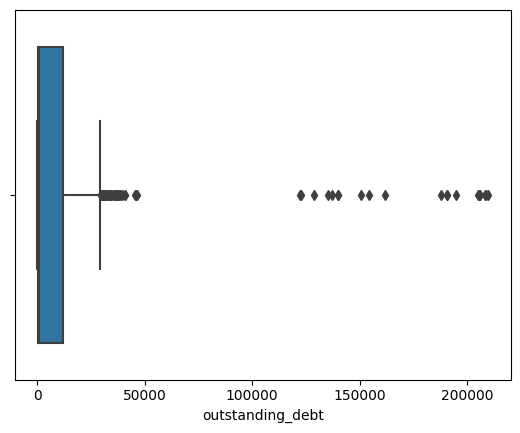

In [78]:
sns.boxplot(x=df_cp_clean3.outstanding_debt)

Instead of using any statistical approach (such as standard deviation or IQR), here too we will use a business knowledge. We will mark any outstanding debt that is greater than credit limit as an outlier

In [79]:
df_cp_clean3[df_cp_clean3.outstanding_debt>df_cp_clean3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


We will replace these outliers with credit_limit. We can assume that there was some data processing error due to we got these high numbers and it is ok to replace them with a credit_limit

In [80]:
df_cp_clean3.loc[df_cp_clean3["outstanding_debt"]>df_cp_clean3["credit_limit"], "outstanding_debt"] = df_cp_clean3["credit_limit"]*df_cp_clean3["credit_utilisation"]

In [81]:
df_cp_clean3[df_cp_clean3.outstanding_debt>df_cp_clean3.credit_limit]   # above we have fixed outliers with by multiplying credit limit with credit utilisation.

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode


All outliers in column outstanding_debt are now GONE. Hurray 🙌🏼😀

In [82]:
df_cp_clean3.loc[[330,544]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode
330,331,799,0.363420,21805.196303,4.0,60000.0,750-799,60000.0
544,545,764,0.337769,20266.137549,2.0,60000.0,750-799,60000.0


### Data Exploration: Visualizing Correlation in Credit Score Table

In [83]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [84]:
df_cp_clean3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode
0,1,749,0.585171,19571.000000,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,134.910109,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.000000,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.000000,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.000000,2.0,40000.0,700-749,40000.0


In [85]:
df_merged = pd.merge(df_cust, df_cp_clean3 , on="cust_id" , how="inner")
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.000000,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,134.910109,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.000000,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.000000,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.000000,2.0,40000.0,700-749,40000.0


In [86]:
numeric_columns = ['age', 'annual_income', 'credit_score', 'credit_utilisation',
       'outstanding_debt', 'credit_limit',]
numeric_columns

['age',
 'annual_income',
 'credit_score',
 'credit_utilisation',
 'outstanding_debt',
 'credit_limit']

In [87]:
correlation_matrix = df_merged[numeric_columns].corr()
correlation_matrix

,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_limit
age,1.000000,0.619037,0.444917,-0.027713,0.448127,0.510993
annual_income,0.619037,1.000000,0.575751,-0.086368,0.569445,0.684775
credit_score,0.444917,0.575751,1.000000,-0.070445,0.711082,0.847952
credit_utilisation,-0.027713,-0.086368,-0.070445,1.000000,0.237032,-0.080493
outstanding_debt,0.448127,0.569445,0.711082,0.237032,1.000000,0.844519
credit_limit,0.510993,0.684775,0.847952,-0.080493,0.844519,1.000000


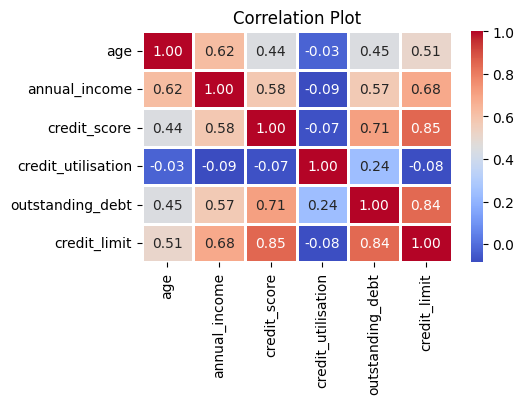

In [88]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.show()

You can see a high correlation between credit limit and credit score (~0.85)

Also credit limit and annual income has a high correlation.

This correlation table can be used for further analysis. It shows if one variable has relationship with the other variable

 # Explore Transactions Table 

In [89]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [90]:
df_trans.shape

(500000, 7)

### Data Cleaning Step 1: Handle NULL Values: platform column

In [91]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

platform has a lot of null values. Let's check them further

In [92]:
print(df_trans.columns)


Index(['tran_id', 'cust_id', 'tran_date', 'tran_amount', 'platform',
       'product_category', 'payment_type'],
      dtype='object')


In [93]:
# we can replace all the null values with platform for maximum selling particular product_category.

max_selling = df_trans.groupby(["platform" , "product_category"]).size().reset_index(name="count")

result = max_selling.loc[max_selling.groupby("product_category")["count"].idxmax()]

print(result)


   platform        product_category  count
9    Amazon  Beauty & Personal Care  16581
10   Amazon                   Books   4054
11   Amazon             Electronics  43486
12   Amazon       Fashion & Apparel  34752
13   Amazon        Garden & Outdoor   7012
14   Amazon              Home Decor  11092
15   Amazon      Kitchen Appliances  16749
16   Amazon                  Sports  14761
17   Amazon            Toys & Games   2956


from here we can derive that maximum used platform is amazon by all categories , so we can replace null platform values with amazon

In [95]:
df_trans_clean1 = df_trans.copy()  # Create a copy of df_trans
df_trans_clean1['platform'] = df_trans_clean1['platform'].fillna('Amazon')  # Replace null values with 'Amazon'


In [96]:
df_trans_clean1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [97]:
df_trans_clean1.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

Once again we got rid of NULL values 🥳

### Data Cleaning Step 2: Treat Outliers: tran_amount

In [98]:
df_trans_clean1.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


We can see transactions with 0 amount. These seem to be invalid

In [99]:
df_trans_zero = df_trans_clean1[df_trans_clean1.tran_amount==0]
df_trans_zero.shape

(4734, 7)

In [100]:
df_trans_zero[["platform","product_category","payment_type" ]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values. We are not using mean because we can see some outliers as well in this column

In [101]:
df_trans1 = df_trans[(df_trans.platform=="Amazon")&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [102]:
median_to_replace = df_trans1[df_trans1.tran_amount>0].tran_amount.median()
median_to_replace

554.0

In [103]:
df_trans["tran_amount"].replace(0,median_to_replace , inplace=True)

In [104]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

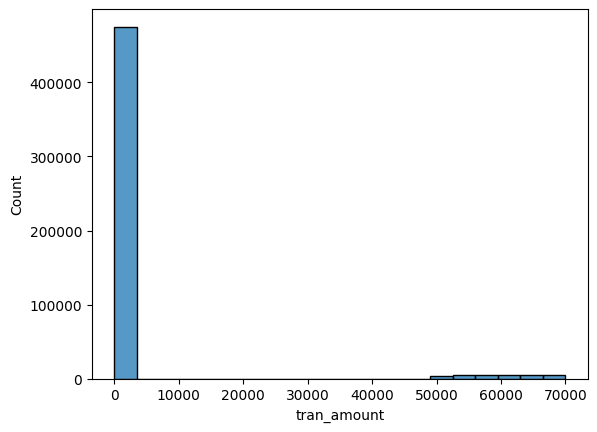

In [105]:
sns.histplot(df_trans.tran_amount , bins = 20)   # it is totally right skewed distrbution , to treat these outliers IQR method will be more suitable

In [106]:
Q1 , Q3 = df_trans["tran_amount"].quantile([0.25,0.75])

IQR = Q3-Q1

lower = Q1 - 2*IQR

upper = Q3 + 2*IQR

lower , upper

(-628.0, 1107.0)

In [107]:
df_trans_outliers = df_trans[df_trans.tran_amount>=upper]
df_trans_outliers.shape

(25000, 7)

In [108]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [109]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [110]:
df_trans.loc[df_trans_outliers.index, "tran_amount"] = df_trans_outliers["product_category"].map(tran_mean_per_category)

In [111]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


We can now see that we got rid of outliers from tran_amount column.

<Axes: xlabel='tran_amount', ylabel='Count'>

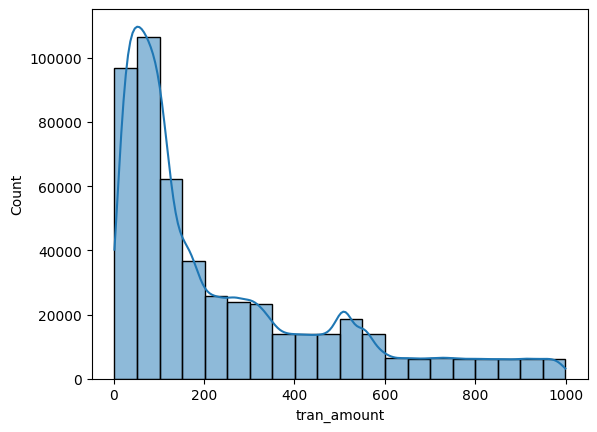

In [112]:
sns.histplot(df_trans.tran_amount, kde=True , bins=20)

Above shows the histogram of transactions after the removal of outliers. You can see that distribution is right skewed. Transaction amount now is less than 1000

### Data Visualization: Payment Type Distribution

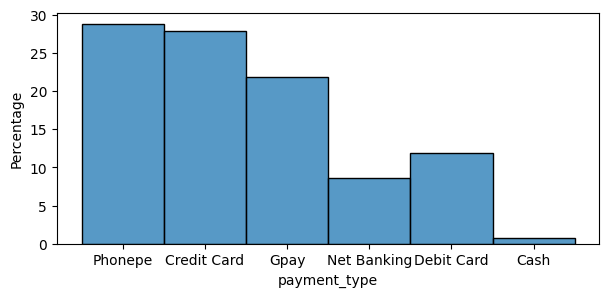

In [113]:
plt.figure(figsize=(7,3))
sns.histplot(x=df_trans['payment_type'], stat='percent', discrete=True)
plt.ylabel('Percentage')
plt.show()


**Distribution of payment types across age groups**

In [114]:
# Earlier we have merged customer and credit profile table . Now we will merge that merged df with transaction df

In [115]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.000000,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,134.910109,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.000000,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.000000,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.000000,2.0,40000.0,700-749,40000.0


In [116]:
df_merged_2 = pd.merge(df_merged , df_trans , on="cust_id" , how="inner")
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,Credit_Score_Range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


#### now here our problem statement is to analyse payment methods used by different age groups.

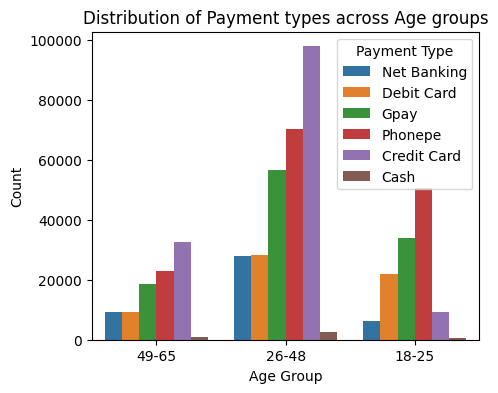

In [118]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2)
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

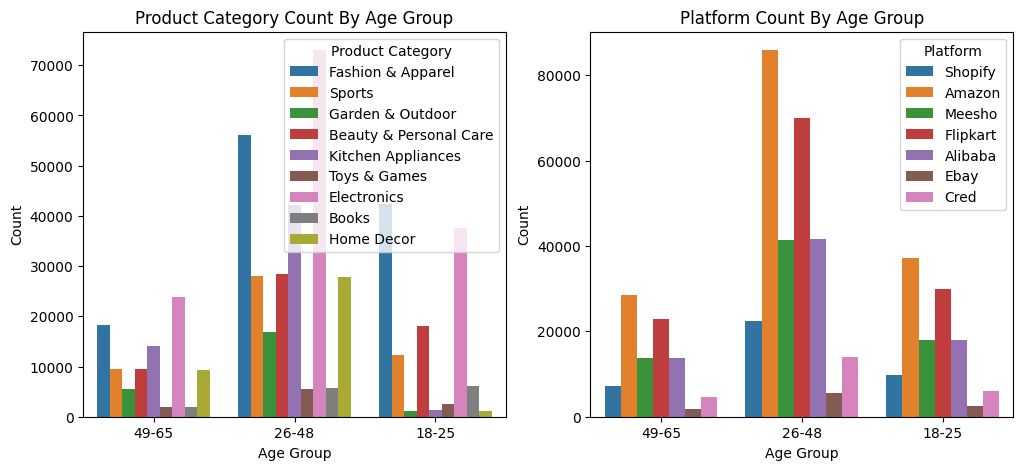

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Platform", loc='upper right')

plt.show()

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

###  Data Visualization: Average Transaction Amount


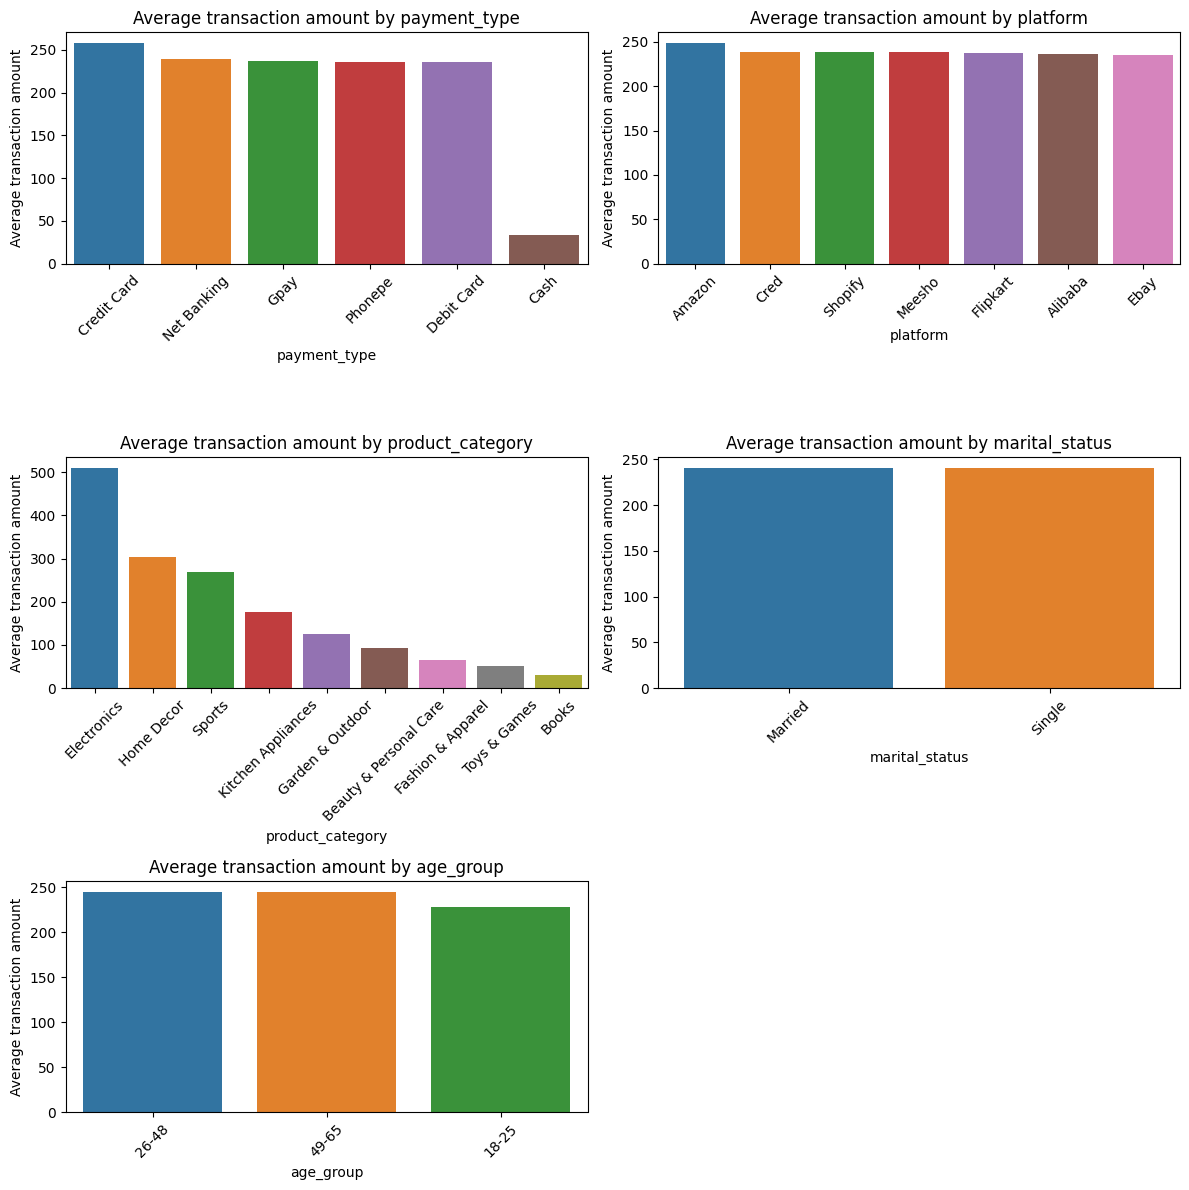

In [120]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [121]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


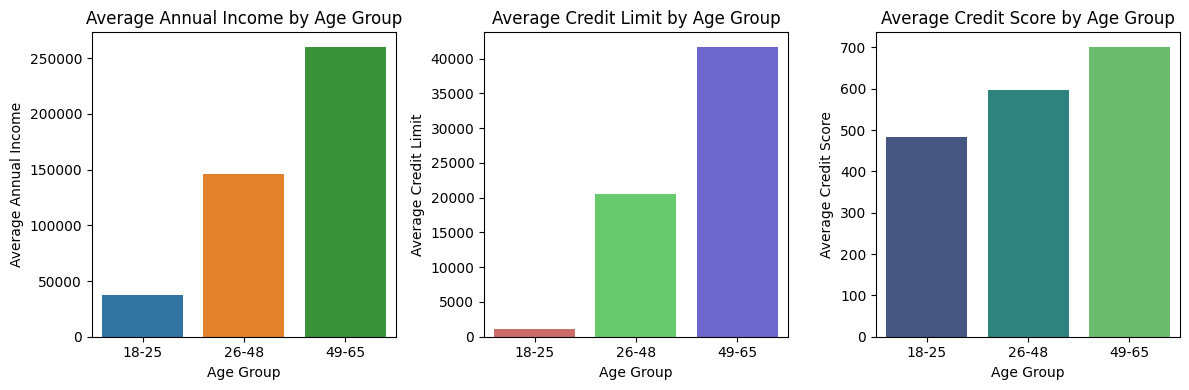

In [122]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:purple">Finalize Target Market For a Trial Credit Card Launch<h2>

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care